<a href="https://colab.research.google.com/github/Ariara61/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_227~251%2C_278~289.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**06 XGBoost(eXtra Gradient Boost)**

XGBoost 개요
* XGBoost: GBM에 기반하고 있지만, GBM의 단점인 느린 수행 시간 및 과적합 규제(Regularization) 부재 등의 문제를 해결함
* 장점
 * 뛰어난 예측 성능
 * GBM 대비 빠른 수행 시간
 * 과적합 규제 (Regularization)
 * Tree pruning (나무 가지치기)
 * 자체 내장된 교차 검증
 * 결손값 자체 처리
* xgboost: XGBoost의 파이썬 패키지명. XGBoost 전용의 파이썬 패키지와 사이킷런과 호환되는 래퍼용 XGBoost가 함께 존재함.
* 파이썬 래퍼 XGBoost 모듈: 독자적인 XGBoost 프레임워크 기반의 XGBoost. XGBoost 고유의 API와 하이퍼 파라미터 이용
* 사이킷런 래퍼 XGBoost 모듈: 사이킷런과 연동되는 모듈. 다른 Estimator와 사용법이 같음


XGBoost 설치하기




In [1]:
import xgboost as xgb
from xgboost import XGBClassifier

파이썬 래퍼 XGBoost 하이퍼 파라미터
* GBM과 유사한 하이퍼 파라미터를 동일하게 가지고 있으며, 여기에 조기 중단(early stopping), 과적합을 규제하기 위한 하이퍼 파라미터 등이 추가됐음.
* 파이썬 래퍼 XGBoost 모듈과 사이킷런 래퍼 XGBoost 모듈의 일부 하이퍼 파라미터는 약간 다르므로 주의가 필요 - 동일한 기능을 의미하는 하이퍼 파라미터이지만, 사이킷런 파라미터의 범용화된 이름 규칙(Naming Rule)에 따라 파라미터 명이 달라짐.
*파이썬 래퍼 XGBoost 하이퍼 파라미터
 * 일반 파라미터: 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터
 * 부스터 파라미터: 트리 최적화, 부스팅, regularization
 * 학습 태스크 파라미터: 객체 함수, 평가를 위한 지표

 1) 주요 일반 파라미터
 * booster: gbtree 또는 gblinear 선택
 * silent: 출력 메세지를 나타내고 싶지 않을 경우 1
 * nthread: CPU의 실행 스레드 개수를 조정

 2) 주요 부스터 파라미터
 * eta [default = 0.3, alias: learning_rate]: GBM의 학습룰과 같은 파라미터
 * num_boost_rounds: GBM의 n_estimators
 * min_child_weight[default = 1]: 트리에서 추가적으로 가지를 나눌지를 결정하기 위해 필요한 데이터들의 weight 총합
 * gamma [default = 0, alias: min_split_loss]: 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값
 * max_depth[default = 6]: 트리 기반 알고리즘의 max_depth
 * sub_sample[default = 1]: GBM의 subsample과 동일
 * colsample_bytree[default = 1]: GBM의 max_features와 유사함
 * lambda[default = 1, alias: reg_lambda]: L2 Regularization 적용 값
 * alpha [default = 0, alias: reg_alpha]: L1 Regularization 적용 값
 * scale_pas_weight[default = 1]: 특정 값으로 치우친 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터

 2) 학습 태스크 파라미터
 * objective: 최솟값을 가져야할 손실 함수를 정의
 * binary:logistic: 이진 분류일 때 적용
 * multi:softmax: 다중 분류일 때 적용
 * multi:softprob: multi:softmax와 유사하나 개별 레이블 클래스의 해당되는 예측 확률을 반환
 * eval_metric: 검증에 사용하는 함수를 정의
  * rmse
  * mae
  * logloss
  * error
  * merror
  * mlogloss
  * auc
 * 과적합 문제가 심각하다면?
  * eta값 낮추고 num_round 높이기
  * max_depth 값 낮추기
  * min_child_weight 값 높이기
  * gamma 값 높이기
  * subsample과 colsample_btree 조정
* XGBoost 자체적으로 교차 검증, 성능 평가, 피처 중요도 등의 시각화 기능을 갖고 있음
* 조기 중단(Early Stopping): 수행 속도를 향상시키기 위한 대표적이 기능 - n_estimators에 지정한 부스팅 반복 횟수에 도달하지 않더라도 예측 오류가 더 이상 개선되지 않으면 반복을 끝까지 수행하지 않고 중지해 수행 시간을 개선할 수 있음



In [2]:
import xgboost

print(xgboost.__version__)

1.7.5


파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측
* 위스콘신 유방암 데이터 세트: 종양의 크기, 모양 등의 다양한 속성값을 기반으로 악성 종양(malignant)인지 양성 종양(benign)인지를 분류한 데이터 세트
* 파이썬 래퍼 XGBoost과 사이킷런의 차이 - 학습용과 테스트용 데이터 세트를 위해 별도의 객체인 DMatrix를 생성함
 * DMAtrix: 넘파이 입력 파라미터를 받아서 만들어지는 XGBoost만의 전용 데이터 세트
 * 주요 입력 파라미터는 data(피처 데이터 세트)와 label(분류: 레이블 데이터 세트, 회귀: 종속값 데이터 세트)
 * 넘파이 외에 libsvm txt 포맷 파일, xgboost 이전 버퍼 파일을 파라미터로 입력받아 변환할 수 있음
* early_stopping_rounds 파라미터를 설정해 조기 중단을 수행하기 위해서는 반드시 eval_set과 eval_metric이 함께 설정돼야 함. XGBoost는 반복마다 eval_set으로 지정된 데이터 세트에서 eval_metric의 지정된 평가 지표로 예측 오류를 측정함
 * eval_set: 성능 평가를 수행할 평가용 데이터 세트 설정
 * eval_metric: 평가 세트에 적용할 성능 평가 방법
* 파이썬 래퍼 XGBoost는 train() 함수를 호출해 학습이 완료된 모델 객체를 반환함. 사이킷런의 predict() 메서드는 예측 결과 클래스 값(즉, 0, 1)을 반환하는 데 반해 xgboost의 predict()는 예측 결괏값이 아닌 예측 결과를 추정할 수 있는 확률 값을 반환함.
* 사이킷런은 Estimator 객체의 feature_importances_ 속성을 이용해 직접 시각화 코드를 작성해야 하지만, xgboost 패키지는 plot_importances()를 이용해 바로 피처 중요도를 시각화할 수 있음.
* xgboost 모듈의 to_graphviz() API를 이용하면 주피터 노트북에 바로 규칙 트리 구조를 그릴 수 있음. xgboost.to_graph-viz() 내에 파라미터로 학습이 완료된 모델 객체와 Graphviz가 참조할 파일명을 입력하면 됨.

In [3]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data = X_features, columns = dataset.feature_names)
cancer_df["target"] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [4]:
print(dataset.target_names)
print(cancer_df["target"].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [5]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                    test_size = 0.2, random_state = 156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [6]:
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)

In [7]:
params = {"max_depth": 3,
          "eta": 0.1,
          "objective": "binary:logistic",
          "eval_metric": "logloss",
          "early_stoppings": 100
          }
num_rounds = 400

In [8]:
# train 데이터 세트는 "train", evaluation(test) 데이터 세트는 "eval"로 명기합니다.
wlist = [(dtrain, "train"), (dtest, "eval")]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params, dtrain = dtrain, num_boost_round = num_rounds, \
                      early_stopping_rounds = 100, evals = wlist)

[06:51:11] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stoppings" } are not used.

[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35415	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train-logloss:0.19218	eval-logloss:0.23156
[13]	train-logloss:0.17792	eval-logloss:0.22005
[14]	train-logloss:0.16522	eval-logloss:0.20857
[15]	train-logloss:0.15362	eval-logloss:0.19999
[16]	train-logloss:0.14333	eval-logloss:0.19012
[17]	train-logloss:0.13398	eval-logloss:0.18182
[18]	train-logloss:0.12560	eval-logloss:0.17473
[19]	

In [9]:
pred_probs = xgb_model.predict(dtest)
print("predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨")
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print("예측값 10개만 표시:", preds[:10])

predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred = None, pred_proba = None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  # ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print("오차 행렬")
  print(confusion)
  # ROC-AUC print 추가
  print("정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
  F1: {3:.4f}, AUC:{4:.4f}".format(accuracy, precision, recall, f1, roc_auc))

In [11]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,  F1: 0.9806, AUC:0.9951


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

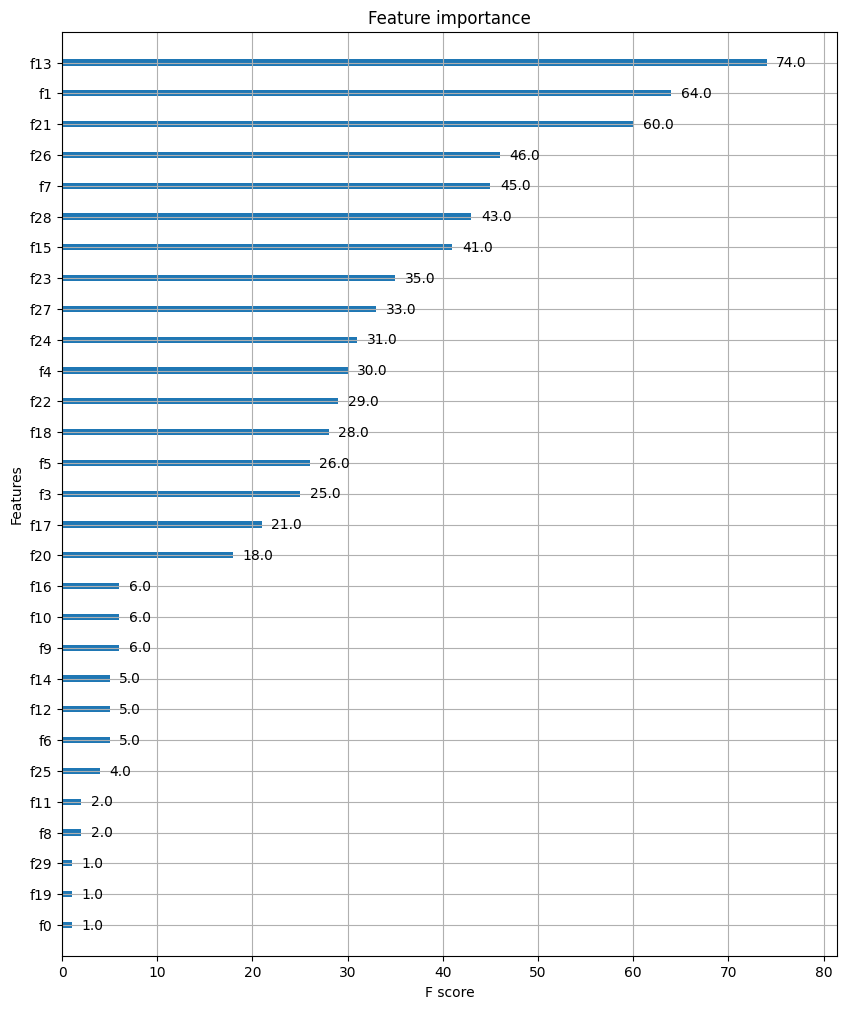

In [12]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(xgb_model, ax = ax)

In [13]:
xgboost.cv(params, dtrain, num_boost_round = 10, nfold = 3, stratified = False, folds = None, metrics = (),
           obj = None, feval = None, maximize = False, early_stopping_rounds = None, fpreproc = None, as_pandas = True,
           verbose_eval = None, show_stdv = True, seed = 0, shuffle = True)

[06:51:16] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stoppings" } are not used.

[06:51:16] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stoppings" } are not used.

[06:51:16] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stoppings" } are not used.



,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.610037,0.000064,0.617448,0.004961
1,0.541817,0.000203,0.555140,0.008989
2,0.483716,0.000955,0.503529,0.012238
3,0.434676,0.001311,0.459869,0.015795
4,0.392310,0.001686,0.423058,0.016788
5,0.355129,0.001391,0.391187,0.019785
6,0.322530,0.001908,0.361119,0.019378
7,0.294159,0.001618,0.337139,0.021086
8,0.269083,0.002068,0.314903,0.019971
9,0.246208,0.001940,0.295012,0.019237


* params (dict): 부스터 파라미터
* dtrain (DMatrix): 학습 데이터
* num_boost_round (int): 부스팅 반복 횟수
* nfold (int): CV 폴드 개수
* stratified (bool): CV 수행 시 층화 표본 추출(stratified sampling) 수행 여부
* metrics (string or list of strings): CV 수행 시 모니터링할 성능 평가 지표
* early_stopping_rounds (int): 조기 중단을 활성화시킴. 반복 횟수 지정.

사이킷런 래퍼 XGBoost의 개요 및 적용
* 사이킷런의 기본 Estimator를 그대로 상속해 만들었기 때문에 다른 Estimator와 동일하게 fit()과 predict()만으로 학습과 예측이 가능함
 * 분류: XGBClassifier
 * 회귀: XGBRegressor
* 하이퍼 파라미터
 * eta → learning_rate
 * sub_sample → subsample
 * lambda → reg_lambda
 * alpha → reg_alpha
 * n_estimators와 num_boost round 하이퍼 파라미터는 서로 동일한 파라미터
* 조기 중단 관련 파라미터
 * early_stopping_rounds: 평가 지표가 향상될 수 있는 반복 횟수를 정의
 * eval_metric: 조기 중단을 위한 평가 지표
 * eval_set: 성능 평가를 수행할 데이터 세트

In [14]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [15]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,  F1: 0.9806, AUC:0.9951


In [16]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = "logloss",
                eval_set = evals, verbose = True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

In [17]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,  F1: 0.9744, AUC:0.9954


In [18]:
# early_stopping_rounds를 10으로 설정하고 재 학습.
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 10,
                eval_metric = "logloss", eval_set = evals, verbose = True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15472
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

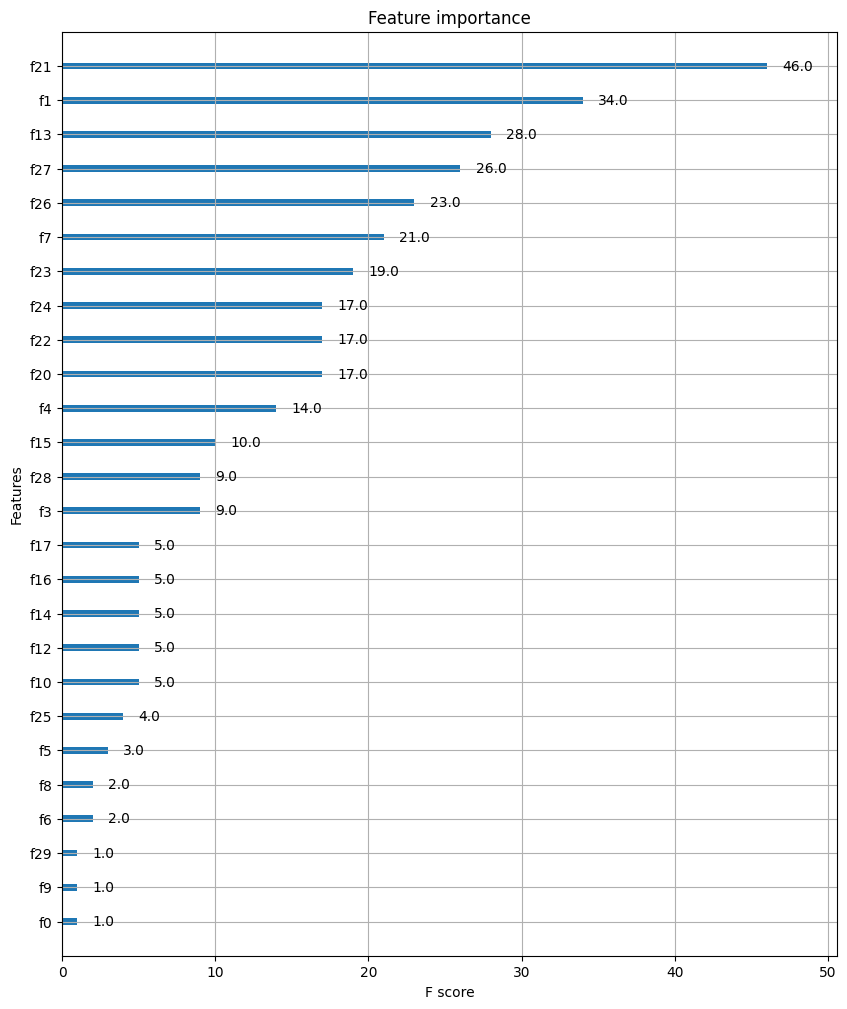

In [19]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10, 12))
# 사이킷런 Wrapper 클래스를 입력해도 무방.
plot_importance(xgb_wrapper,ax = ax)

**07 LightGBM**
* LightGBM
 * 장점: XGBoost보다 학습에 걸리는 시간이 훨씬 적음. 또 메모리 사용량도 상대적으로 적음. 기능상의 다양성은 더 많음. 대용량 데이터에 대한 뛰어난 예측 성능 및 병렬 컴퓨팅 기능을 제공. 
 * 단점: 과적합이 발생하기 쉬움
* 일반 GBM 계열의 트리 분할 방법과 다르게 리프 중심 트리 분할(Leaf Wise) 방식을 사용함. 트리의 균형을 맞추지 않고, 최대한 손실 값(max delta loss)을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성됨. 
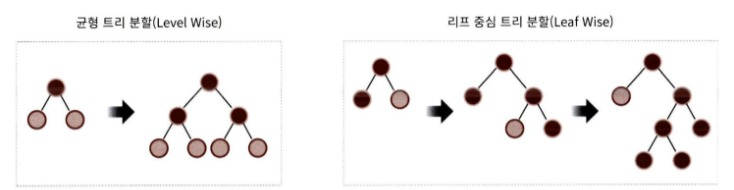
* 파이썬 패키지명 - lightbgm
 * 분류: LGBMClassifier
 * 회귀: LGBMRegressor


LightGBM 설치

In [20]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


LightGBM 하이퍼 파라미터
* LightGBM은 Xgboost와 다르게 리프 노드가 계속 분할되면서 트리의 깊이가 깊어지므로 이러한 트리 특성에 맞는 하이퍼 파라미터의 설정이 필요함 (예: max_depth를 매우 크게 가짐)
* 주요 파라미터
 * num_iterations [default = 100]: 반복 수행하려는 트리의 개수를 지정 
 * learning_rate [default = 0.1]: 0에서 1 사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값
 * max_depth [default = -1]: 트리 기반 알고리즘의 max_depth와 같음
 * min_data_in_leaf [default = 20]: 결정 트리의 min_samples와 같은 파라미터
 * num_leaves [default = 31]: 하나의 트리가 가질 수 있는 최대 리프 개수
 * boosting [default = gbdt]: 부스팅의 트리를 생성하는 알고리즘
  * gbdt: 일반적인 그래디언트 부스팅 결정 트리
  * rf: 랜덤 포레스트
 * bagging_fraction [default = 1.0]: 트리가 커져서 과적합되는 것을 제어하기 위해서 데이터를 샘플링하는 비율을 지정
 * feature_fraction [default = 1.0]: 개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율
 * lambda_l2 [default = 0.0]: L2 regulation 제어를 위한 값
 * lambda_l1 [default = 0.0]: L1 regulation 제어를 위한 값

* Learning Task 파라미터
 * objective: 최솟값을 가져야 할 손실함수

하이퍼 파라미터의 튜닝 방안
* num_leaves: 개별 트리가 가질 수 있는 최대 리프의 개수이고 LightGBM 모델의 복잡도를 제어하는 주요 파라미터
* min_data_in_leaf: 과적합을 개선하기 위한 중요한 파라미터
* max_depth: 깊이의 크기를 제한
* learning_rate를 작게 하면서 n_estimators를 크게 하기
* 과적합을 제어하기 위해서 reg_lambda, reg_alpha와 같은 regularization을 적용하거나 학습 데이터에 사용할 피처의 개수나 데이터 샘플링 코드 개수를 줄이기 위해 colsample_bytree, subsample 파라미터를 적용 

파이썬 래퍼 LightBGM과 사이킷런 XGBoost, LightGBM 하이퍼 파라미터 비교
* 사이킷런 래퍼 LightGBM클래스와 사이킷런 래퍼 XGBoost 클래스는 많은 하이퍼 파라미터가 같음
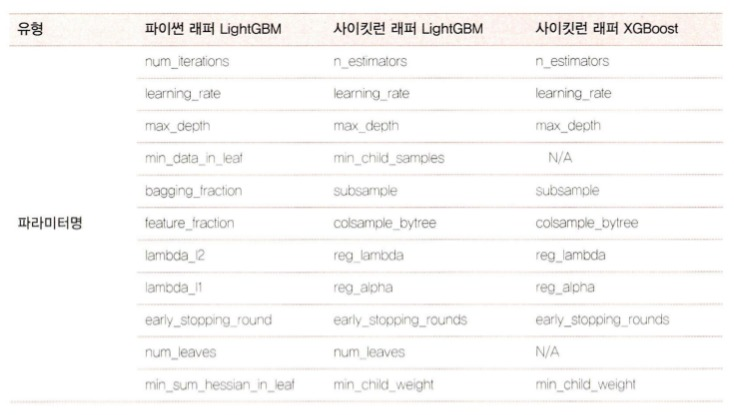

LightGBM 적용 - 위스콘신 유방암 예측

In [21]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size = 0.2, random_state = 156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정
lgbm_wrapper = LGBMClassifier(n_estimators = 400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능.
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = "logloss",
                 eval_set = evals, verbose = True)
pred = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.565079
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_logloss: 0.151113
[25]	valid_0's binary_logloss: 0.148395
[26]	vali

In [22]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,  F1: 0.9806, AUC:0.9905


**10 스태킹 앙상블**
* 스태킹(Stacking): 개별적인 여러 알고리즘을 서로 결합해 예측 결과를 도출한다는 점에서 배깅(Bagging) 및 부스팅(Boosting)과 공통점을 가짐. 차이점은 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행한다는 것. → 개별 알고리즘의 예측 결과 데이터 세트를 최종적인 메타 데이터 세트로 만들어 별도의 ML 알고리즘으로 최종 학습을 수행하고 테스트 데이터 기반으로 다시 최종 예측을 수행함.
* 개별적인 기반 모델과, 이 개별 기반 모델의 예측 데이터를 학습 데이터로 만들어서 학습하는 최종 메타 모델이 필요
* 여러 개별 모델의 예측 데이터를 각각 스태킹 형태로 결합해 최종 메타 모델의 학습용 피처 데이터 세트와 테스트용 피처 데이터 세트를 만드는 것

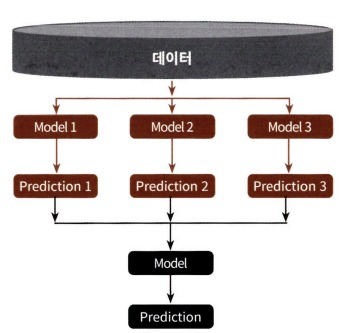

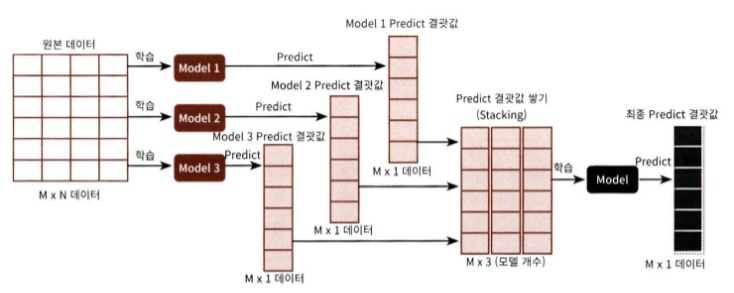


기본 스태킹 모델

In [23]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size = 0.2, random_state = 0)

In [24]:
# 개별 ML 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors = 4)
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators = 100)

# 스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
lr_final = LogisticRegression(C = 10)

In [25]:
# 개별 모델들을 학습.
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [26]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성하고 개별 모델의 정확도 측정
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print("KNN 정확도: {0:.4f}".format(accuracy_score(y_test, knn_pred)))
print("랜덤 포레스트 정확도: {0:.4f}".format(accuracy_score(y_test, rf_pred)))
print("결정 트리 정확도: {0:.4f}".format(accuracy_score(y_test, dt_pred)))
print("에이다부스트 정확도: {0:.4f}".format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9035
에이다부스트 정확도: 0.9561


In [27]:
pred = np.array([knn_pred ,rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환, 칼럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦.
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [28]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print("최종 메타 모델의 예측 정확도: {0:.4f}".format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도: 0.9649


CV 세트 기반의 스태킹
* 과적합을 개선하기 위해 최종 메타 모델을 위한 데이터 세트를 만들 때 교차 검증 기반으로 예측된 결과 데이터 세트를 이용함.
* 개별 모델들이 각각 교차 검증으로 메타 모델을 위한 학습용 스태킹 데이터 생성과 예측을 위한 테스트용 스태킹 데이터를 생성한 뒤 이를 기반으로 메타 모델이 학습과 예측을 수행함.
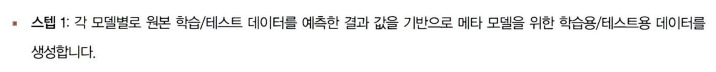

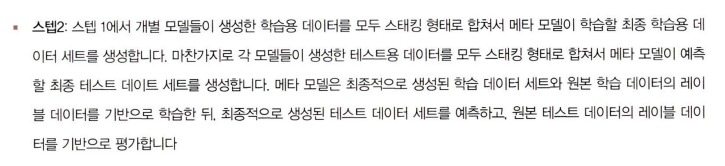
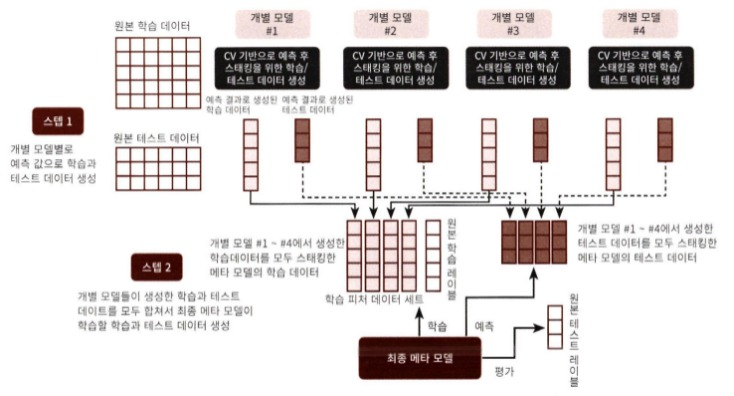

In [29]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수.
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
  # 지정된 n_folds 값으로 KFold 생성.
  kf = KFold(n_splits = n_folds, shuffle = True, random_state = 0)
  # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
  train_fold_pred = np.zeros((X_train_n.shape[0], 1))
  test_pred = np.zeros((X_test_n.shape[0], n_folds))
  print(model.__class__.__name__ , ' model 시작 ')

  for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
    # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
    print("\t 폴드 세트: ", folder_counter, "시작")
    X_tr = X_train_n[train_index]
    y_tr = y_train_n[train_index]
    X_te = X_train_n[valid_index]

    # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
    model.fit(X_tr, y_tr)
    # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
    train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1, 1)
    # 입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장.
    test_pred[:, folder_counter] = model.predict(X_test_n)

  # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
  test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1, 1)

  # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
  return train_fold_pred, test_pred_mean

In [30]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
RandomForestClassifier  model 시작 
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작
AdaBoostClassifier  model 시작 
	 폴드 세트:  0 시작
	 폴드 세트:  1 시작
	 폴드 세트:  2 시작
	 폴드 세트:  3 시작
	 폴드 세트:  4 시작
	 폴드 세트:  5 시작
	 폴드 세트:  6 시작


In [31]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis = 1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis = 1)
print("원본 학습 피처 데이터 Shape: ", X_train.shape, "원본 테스트 피처 Shape: ", X_test.shape)
print("스태킹 학습 피처 데이터 Shape: ", Stack_final_X_train.shape,
      "스태킹 테스트 피처 데이터 Shape: ", Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape:  (455, 30) 원본 테스트 피처 Shape:  (114, 30)
스태킹 학습 피처 데이터 Shape:  (455, 4) 스태킹 테스트 피처 데이터 Shape:  (114, 4)


In [33]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print("최종 메타 모델의 예측 정확도: {0:.4f}".format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9649
